In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from feature_selectors import selection
from sklearn.preprocessing import StandardScaler

In [2]:
gebruikers_df = pd.read_csv(r'..\..\data\gebruikersinformatie.csv', delimiter = ';')
evenement_df = pd.read_csv(r'..\..\data\evenementinformatie.csv', delimiter = ';')
aanwezigheid_df = pd.read_csv(r'..\..\data\evenementaanwezigheid.csv', delimiter = ';')
bericht_df = pd.read_csv(r'..\..\data\berichtinteracties_met_sentiment.csv', delimiter = ';')

In [3]:
# Merge bericht_df with evenement_df
bericht_df = bericht_df.merge(evenement_df, on = "EvenementID", how = "left")

# Merge the result with gebruikers_df
bericht_df = bericht_df.merge(gebruikers_df, on = "GebruikerID", how = "left")

# Rename columns for consistency
bericht_df.rename(
    columns = {col: f"Evenement_{col}" for col in evenement_df.columns if col != "EvenementID"},
    inplace = True
)

bericht_df.rename(
    columns = {col: f"Gebruiker_{col}" for col in gebruikers_df.columns if col != "GebruikerID"},
    inplace = True
)

bericht_df

,BerichtID,BerichtDatum,GebruikerID,EvenementID,BerichtSentiment,OntvangenLikes,OntvangenReacties,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,B001,18-5-2023,G309,E012,Neutraal,5,8,Hackathon,24-4-2023,G271,23-12-2023,2-8-2024,19.0,Security & Cloud,Derdejaars,Premium
1,B002,6-10-2023,G021,E039,Positief,9,6,Workshop,1-9-2023,G199,14-1-2023,3-2-2023,17.0,Human computer interaction,Eerstejaars,Premium
2,B003,7-7-2023,G111,E001,Positief,8,5,BBQ,24-2-2023,G296,19-4-2023,10-6-2023,17.0,Human computer interaction,Derdejaars,Premium
3,B004,5-10-2023,G168,E015,Negatief,4,0,Hackathon,20-7-2023,G199,24-2-2023,18-3-2023,19.0,Human computer interaction,Tweedejaars,Premium
4,B005,22-1-2023,G076,E017,Neutraal,1,8,Lezing,14-12-2023,G201,25-3-2023,30-11-2023,17.0,Data engineering,Tweedejaars,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,B496,16-2-2023,G263,E010,Neutraal,19,0,BBQ,19-12-2023,G135,28-8-2023,20-5-2024,12.0,Security & Cloud,Vierdejaars,Premium
496,B497,22-3-2023,G011,E004,Positief,17,6,BBQ,13-5-2023,G096,14-2-2023,27-3-2023,17.0,Human computer interaction,Eerstejaars,Premium
497,B498,18-12-2023,G005,E004,Positief,0,4,BBQ,13-5-2023,G096,6-5-2023,5-1-2024,17.0,Human computer interaction,Eerstejaars,Premium
498,B499,5-6-2023,G243,E013,Positief,20,9,Lezing,17-8-2023,G161,23-5-2023,3-3-2024,22.0,Human computer interaction,Vierdejaars,Premium


In [4]:
# Remove nonvalid entries
bericht_df = bericht_df[~(bericht_df['Gebruiker_Leeftijd'].isna())]
bericht_df = bericht_df[~(bericht_df['Gebruiker_Lidmaatschapstype'] == 'x')]
bericht_df

,BerichtID,BerichtDatum,GebruikerID,EvenementID,BerichtSentiment,OntvangenLikes,OntvangenReacties,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,B001,18-5-2023,G309,E012,Neutraal,5,8,Hackathon,24-4-2023,G271,23-12-2023,2-8-2024,19.0,Security & Cloud,Derdejaars,Premium
1,B002,6-10-2023,G021,E039,Positief,9,6,Workshop,1-9-2023,G199,14-1-2023,3-2-2023,17.0,Human computer interaction,Eerstejaars,Premium
2,B003,7-7-2023,G111,E001,Positief,8,5,BBQ,24-2-2023,G296,19-4-2023,10-6-2023,17.0,Human computer interaction,Derdejaars,Premium
3,B004,5-10-2023,G168,E015,Negatief,4,0,Hackathon,20-7-2023,G199,24-2-2023,18-3-2023,19.0,Human computer interaction,Tweedejaars,Premium
4,B005,22-1-2023,G076,E017,Neutraal,1,8,Lezing,14-12-2023,G201,25-3-2023,30-11-2023,17.0,Data engineering,Tweedejaars,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,B496,16-2-2023,G263,E010,Neutraal,19,0,BBQ,19-12-2023,G135,28-8-2023,20-5-2024,12.0,Security & Cloud,Vierdejaars,Premium
496,B497,22-3-2023,G011,E004,Positief,17,6,BBQ,13-5-2023,G096,14-2-2023,27-3-2023,17.0,Human computer interaction,Eerstejaars,Premium
497,B498,18-12-2023,G005,E004,Positief,0,4,BBQ,13-5-2023,G096,6-5-2023,5-1-2024,17.0,Human computer interaction,Eerstejaars,Premium
498,B499,5-6-2023,G243,E013,Positief,20,9,Lezing,17-8-2023,G161,23-5-2023,3-3-2024,22.0,Human computer interaction,Vierdejaars,Premium


In [5]:
# Convert ID to ints
to_convert = ["BerichtID", "GebruikerID", "EvenementID", "Evenement_OrganisatorID"]

for col in to_convert:
    bericht_df[col] = bericht_df[col].str[1:].astype(int)
    
bericht_df

,BerichtID,BerichtDatum,GebruikerID,EvenementID,BerichtSentiment,OntvangenLikes,OntvangenReacties,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,1,18-5-2023,309,12,Neutraal,5,8,Hackathon,24-4-2023,271,23-12-2023,2-8-2024,19.0,Security & Cloud,Derdejaars,Premium
1,2,6-10-2023,21,39,Positief,9,6,Workshop,1-9-2023,199,14-1-2023,3-2-2023,17.0,Human computer interaction,Eerstejaars,Premium
2,3,7-7-2023,111,1,Positief,8,5,BBQ,24-2-2023,296,19-4-2023,10-6-2023,17.0,Human computer interaction,Derdejaars,Premium
3,4,5-10-2023,168,15,Negatief,4,0,Hackathon,20-7-2023,199,24-2-2023,18-3-2023,19.0,Human computer interaction,Tweedejaars,Premium
4,5,22-1-2023,76,17,Neutraal,1,8,Lezing,14-12-2023,201,25-3-2023,30-11-2023,17.0,Data engineering,Tweedejaars,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,16-2-2023,263,10,Neutraal,19,0,BBQ,19-12-2023,135,28-8-2023,20-5-2024,12.0,Security & Cloud,Vierdejaars,Premium
496,497,22-3-2023,11,4,Positief,17,6,BBQ,13-5-2023,96,14-2-2023,27-3-2023,17.0,Human computer interaction,Eerstejaars,Premium
497,498,18-12-2023,5,4,Positief,0,4,BBQ,13-5-2023,96,6-5-2023,5-1-2024,17.0,Human computer interaction,Eerstejaars,Premium
498,499,5-6-2023,243,13,Positief,20,9,Lezing,17-8-2023,161,23-5-2023,3-3-2024,22.0,Human computer interaction,Vierdejaars,Premium


In [6]:
# Factorize
to_factorize = ["BerichtSentiment", "Evenement_EvenementType", "Gebruiker_Studierichting", "Gebruiker_Lidmaatschapstype"]

for col in to_factorize:
    bericht_df[col], unique_values = pd.factorize(bericht_df[col])

    print(f"\n{col} numerics:")
    for i, value in enumerate(unique_values):
        print(f"{i} -> {value}")

bericht_df["Gebruiker_Studiejaar"] = bericht_df["Gebruiker_Studiejaar"].map({
    "Eerstejaars": 1,
    "Tweedejaars": 2,
    "Derdejaars": 3,
    "Vierdejaars": 4
})

bericht_df


BerichtSentiment numerics:
0 -> Neutraal
1 -> Positief
2 -> Negatief

Evenement_EvenementType numerics:
0 -> Hackathon
1 -> Workshop
2 -> BBQ
3 -> Lezing

Gebruiker_Studierichting numerics:
0 -> Security & Cloud
1 -> Human computer interaction
2 -> Data engineering
3 -> Data Engineering
4 -> Software engineering

Gebruiker_Lidmaatschapstype numerics:
0 -> Premium
1 -> Regulier


,BerichtID,BerichtDatum,GebruikerID,EvenementID,BerichtSentiment,OntvangenLikes,OntvangenReacties,Evenement_EvenementType,Evenement_EvenementDatum,Evenement_OrganisatorID,Gebruiker_RegistratieDatum,Gebruiker_LaatsteLogin,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype
0,1,18-5-2023,309,12,0,5,8,0,24-4-2023,271,23-12-2023,2-8-2024,19.0,0,3,0
1,2,6-10-2023,21,39,1,9,6,1,1-9-2023,199,14-1-2023,3-2-2023,17.0,1,1,0
2,3,7-7-2023,111,1,1,8,5,2,24-2-2023,296,19-4-2023,10-6-2023,17.0,1,3,0
3,4,5-10-2023,168,15,2,4,0,0,20-7-2023,199,24-2-2023,18-3-2023,19.0,1,2,0
4,5,22-1-2023,76,17,0,1,8,3,14-12-2023,201,25-3-2023,30-11-2023,17.0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,16-2-2023,263,10,0,19,0,2,19-12-2023,135,28-8-2023,20-5-2024,12.0,0,4,0
496,497,22-3-2023,11,4,1,17,6,2,13-5-2023,96,14-2-2023,27-3-2023,17.0,1,1,0
497,498,18-12-2023,5,4,1,0,4,2,13-5-2023,96,6-5-2023,5-1-2024,17.0,1,1,0
498,499,5-6-2023,243,13,1,20,9,3,17-8-2023,161,23-5-2023,3-3-2024,22.0,1,4,0


In [7]:
# Convert columns to datetime datatype and extract day/month/year
date_columns = ['BerichtDatum', 'Evenement_EvenementDatum', 'Gebruiker_RegistratieDatum','Gebruiker_LaatsteLogin']

for col in date_columns:
    bericht_df[col] = pd.to_datetime(bericht_df[col], dayfirst=True)
    
for col in date_columns:
    bericht_df[f'{col}_day'] = bericht_df[col].dt.day
    bericht_df[f'{col}_month'] = bericht_df[col].dt.month
    bericht_df[f'{col}_year'] = bericht_df[col].dt.year
    
bericht_df.drop(columns = date_columns, inplace = True)

bericht_df

,BerichtID,GebruikerID,EvenementID,BerichtSentiment,OntvangenLikes,OntvangenReacties,Evenement_EvenementType,Evenement_OrganisatorID,Gebruiker_Leeftijd,Gebruiker_Studierichting,Gebruiker_Studiejaar,Gebruiker_Lidmaatschapstype,BerichtDatum_day,BerichtDatum_month,Evenement_EvenementDatum_day,Evenement_EvenementDatum_month,Gebruiker_RegistratieDatum_day,Gebruiker_RegistratieDatum_month,Gebruiker_LaatsteLogin_day,Gebruiker_LaatsteLogin_month
0,1,309,12,0,5,8,0,271,19.0,0,3,0,18,5,24,4,23,12,2,8
1,2,21,39,1,9,6,1,199,17.0,1,1,0,6,10,1,9,14,1,3,2
2,3,111,1,1,8,5,2,296,17.0,1,3,0,7,7,24,2,19,4,10,6
3,4,168,15,2,4,0,0,199,19.0,1,2,0,5,10,20,7,24,2,18,3
4,5,76,17,0,1,8,3,201,17.0,2,2,0,22,1,14,12,25,3,30,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,263,10,0,19,0,2,135,12.0,0,4,0,16,2,19,12,28,8,20,5
496,497,11,4,1,17,6,2,96,17.0,1,1,0,22,3,13,5,14,2,27,3
497,498,5,4,1,0,4,2,96,17.0,1,1,0,18,12,13,5,6,5,5,1
498,499,243,13,1,20,9,3,161,22.0,1,4,0,5,6,17,8,23,5,3,3


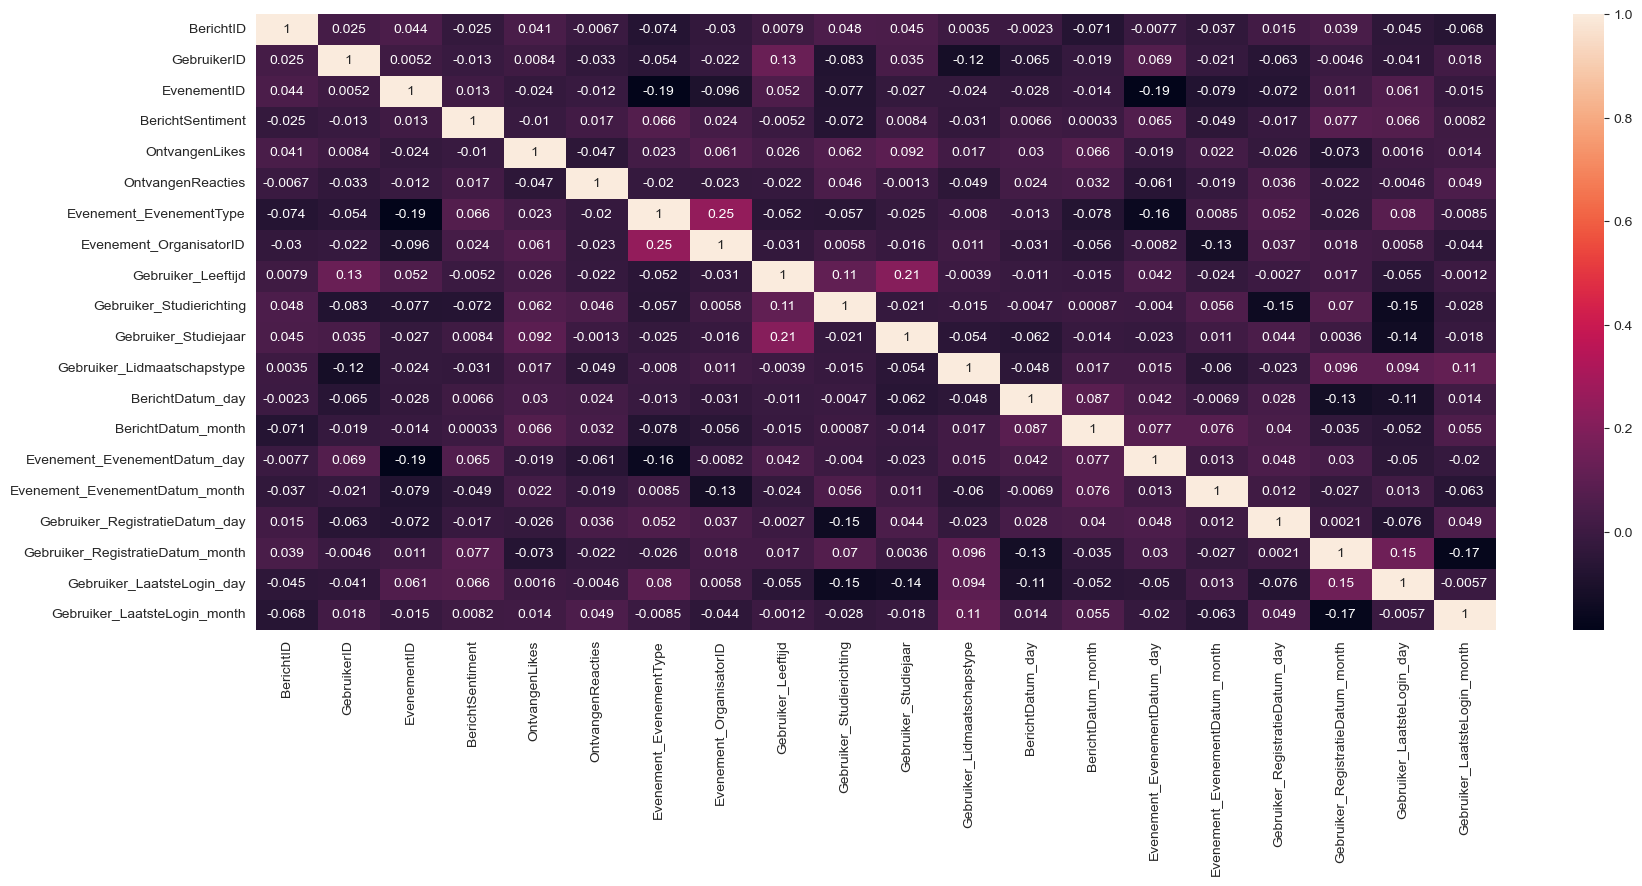

In [8]:
plt.figure(figsize = (20, 8))
sns.heatmap(bericht_df.corr(), annot = True)
plt.show()

In [11]:
# Test all outcomes to see which has the highest score
model = LinearRegression()
results = {}

for outcome in bericht_df.columns.tolist():
    test_predictors = bericht_df.columns.tolist()
    test_predictors.remove(outcome)

    predictors, score = selection(model, bericht_df, bericht_df[outcome], test_predictors, mode = "forward",
                                  metric = "adj_r2")

    # results[outcome] = (score, predictors)
    results[outcome] = score

print('\n\nOutcome\t\t\tScore')
for key, value in results.items():
    # print(f'{key} -> {value[0]}')
    print(f'{key} -> {value}')


Currently best predictors: []
Corresponding score: 0
Checking predictor: GebruikerID
Score: -0.0014420045101939394
Checking predictor: EvenementID
Score: -0.00013527124403767132
Checking predictor: BerichtSentiment
Score: -0.0014146954658806887
Checking predictor: OntvangenLikes
Score: -0.0003796506002429201
Checking predictor: OntvangenReacties
Score: -0.0020077813343448714
Checking predictor: Evenement_EvenementType
Score: 0.0033642208590574096
Checking predictor: Evenement_OrganisatorID
Score: -0.001162618360749823
Checking predictor: Gebruiker_Leeftijd
Score: -0.0019912746038943663
Checking predictor: Gebruiker_Studierichting
Score: 0.00029592548378365446
Checking predictor: Gebruiker_Studiejaar
Score: -6.865088363894323e-05
Checking predictor: Gebruiker_Lidmaatschapstype
Score: -0.0020414517068030325
Checking predictor: BerichtDatum_day
Score: -0.002048151028180234
Checking predictor: BerichtDatum_month
Score: 0.0030329481752159326
Checking predictor: Evenement_EvenementDatum_day